## **1. Introdução**

A análise abaixo foi realizada utilizando os dados de bilheteria diária das salas de cinema do Brasil. Os dados estão disponíveis em  https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-distribuidoras  

Será utilizado nessa análise os dados referente ao período de março de 2019 a março de 2024.

A proposta é realizar uma análise exploratória com os dados para levantar algumas informações acerca das obras exibidas no Brasil, e dos complexos e salas de cinema do país.

Perguntas a serem respondidas com a análise:

- Quais os 10 filmes com maior número de público durante o período registrado na base?
- Quais os 10 filmes brasileiros com maior número de público durante o período registrado na base?
- Quantos filmes nacionais e internacionais foram exibidos?
- Existe uma diferença significativa de publico entre filmes nacionais e internacionais?
- Qual é a média de público por estado?
- Quantos filmes diferentes foram exibidos em cada estado?
- Do período registrado na base, qual ano teve maior público?
- Existem meses específicos com maior público?




## **2. Carregando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import duckdb

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)


import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import glob

## **3. Carregando o dataset**

In [2]:
# mesclando os arquivos csv e transformando em DataFrame
arquivos_csv = glob.glob('*.csv')

dfs = []

for arquivo in arquivos_csv:
    dfs.append(pd.read_csv(arquivo, sep=';'))

df = pd.concat(dfs, ignore_index=True)

## **4. Conhecendo o dataset e tratando os dados**

In [3]:
df

,DATA_EXIBICAO,TITULO_ORIGINAL,TITULO_BRASIL,CPB_ROE,PAIS_OBRA,REGISTRO_SALA,NOME_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
0,01/03/2019,A DOG´S WAY HOME,A CAMINHO DE CASA,E1800535400000,ESTADOS UNIDOS,5005371.00,2118 CINEMARK CENTER SHOPPING JACAREPAGUÁ SALA 04,15,6000018.00,1843.00,31558.00,RIO DE JANEIRO,RJ,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98
1,01/03/2019,A DOG´S WAY HOME,A CAMINHO DE CASA,E1800535400000,ESTADOS UNIDOS,5005376.00,2120 CINEMARK MOGI DAS CRUZES SALA 05,80,6000018.00,1843.00,31561.00,MOGI DAS CRUZES,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98
2,01/03/2019,A DOG´S WAY HOME,A CAMINHO DE CASA,E1800535400000,ESTADOS UNIDOS,5000678.00,ABC PLAZA 10,41,6000018.00,1843.00,896.00,SANTO ANDRÉ,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98
3,01/03/2019,A DOG´S WAY HOME,A CAMINHO DE CASA,E1800535400000,ESTADOS UNIDOS,5002062.00,AGUA VERDE 1,17,6000023.00,12893.00,12894.00,CURITIBA,PR,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98
4,01/03/2019,A DOG´S WAY HOME,A CAMINHO DE CASA,E1800535400000,ESTADOS UNIDOS,5000799.00,ANÁLIA FRANCO - SALA 08,160,6000058.00,749.00,2622.00,SÃO PAULO,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,00.979.601/0001-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495353,31/03/2024,THE ZONE OF INTEREST,ZONA DE INTERESSE,E2300522600000,ESTADOS UNIDOS,5001792.00,SALADEARTE CINEMAM,27,6000052.00,5722.00,5694.00,SALVADOR,BA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13
7495354,31/03/2024,UTOPIA TROPICAL,NaN,B2300363900000,BRASIL,5003418.00,ESPAÇO ITAÚ DE CINEMA BRASILIA 8,4,6000029.00,1944.00,20590.00,BRASÍLIA,DF,O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.,67.431.718/0001-03
7495355,31/03/2024,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,E2400057000000,FRANÇA,5000849.00,CINE ESTAÇÃO NET BOTAFOGO SALA 2,10,6000030.00,2685.00,6713.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA,10.383.039/0001-99
7495356,31/03/2024,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,E2400057000000,FRANÇA,5002218.00,ESTAÇÃO NET GÁVEA 3,4,6000030.00,592.00,13608.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA,10.383.039/0001-99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495358 entries, 0 to 7495357
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   DATA_EXIBICAO               object 
 1   TITULO_ORIGINAL             object 
 2   TITULO_BRASIL               object 
 3   CPB_ROE                     object 
 4   PAIS_OBRA                   object 
 5   REGISTRO_SALA               float64
 6   NOME_SALA                   object 
 7   PUBLICO                     int64  
 8   REGISTRO_GRUPO_EXIBIDOR     float64
 9   REGISTRO_EXIBIDOR           float64
 10  REGISTRO_COMPLEXO           float64
 11  MUNICIPIO_SALA_COMPLEXO     object 
 12  UF_SALA_COMPLEXO            object 
 13  RAZAO_SOCIAL_DISTRIBUIDORA  object 
 14  CNPJ_DISTRIBUIDORA          object 
dtypes: float64(4), int64(1), object(10)
memory usage: 857.8+ MB


In [5]:
# Transformando a coluna de data_exibicao no tipo date
df['DATA_EXIBICAO'] = pd.to_datetime(df['DATA_EXIBICAO'], format='%d/%m/%Y')

In [6]:
# Excluindo colunas que não serão necessárias
df = df.drop(['CPB_ROE', 'CNPJ_DISTRIBUIDORA'], axis=1)
df

,DATA_EXIBICAO,TITULO_ORIGINAL,TITULO_BRASIL,PAIS_OBRA,REGISTRO_SALA,NOME_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA
0,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5005371.00,2118 CINEMARK CENTER SHOPPING JACAREPAGUÁ SALA 04,15,6000018.00,1843.00,31558.00,RIO DE JANEIRO,RJ,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
1,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5005376.00,2120 CINEMARK MOGI DAS CRUZES SALA 05,80,6000018.00,1843.00,31561.00,MOGI DAS CRUZES,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
2,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5000678.00,ABC PLAZA 10,41,6000018.00,1843.00,896.00,SANTO ANDRÉ,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
3,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5002062.00,AGUA VERDE 1,17,6000023.00,12893.00,12894.00,CURITIBA,PR,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
4,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5000799.00,ANÁLIA FRANCO - SALA 08,160,6000058.00,749.00,2622.00,SÃO PAULO,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495353,2024-03-31,THE ZONE OF INTEREST,ZONA DE INTERESSE,ESTADOS UNIDOS,5001792.00,SALADEARTE CINEMAM,27,6000052.00,5722.00,5694.00,SALVADOR,BA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...
7495354,2024-03-31,UTOPIA TROPICAL,NaN,BRASIL,5003418.00,ESPAÇO ITAÚ DE CINEMA BRASILIA 8,4,6000029.00,1944.00,20590.00,BRASÍLIA,DF,O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.
7495355,2024-03-31,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,FRANÇA,5000849.00,CINE ESTAÇÃO NET BOTAFOGO SALA 2,10,6000030.00,2685.00,6713.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA
7495356,2024-03-31,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,FRANÇA,5002218.00,ESTAÇÃO NET GÁVEA 3,4,6000030.00,592.00,13608.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA


In [7]:
# Renomeando as colunas
df.columns = df.columns.str.lower()
df = df.rename(columns={'razao_social_distribuidora': 'nome_distribuidora'})
df

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
0,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5005371.00,2118 CINEMARK CENTER SHOPPING JACAREPAGUÁ SALA 04,15,6000018.00,1843.00,31558.00,RIO DE JANEIRO,RJ,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
1,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5005376.00,2120 CINEMARK MOGI DAS CRUZES SALA 05,80,6000018.00,1843.00,31561.00,MOGI DAS CRUZES,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
2,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5000678.00,ABC PLAZA 10,41,6000018.00,1843.00,896.00,SANTO ANDRÉ,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
3,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5002062.00,AGUA VERDE 1,17,6000023.00,12893.00,12894.00,CURITIBA,PR,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
4,2019-03-01,A DOG´S WAY HOME,A CAMINHO DE CASA,ESTADOS UNIDOS,5000799.00,ANÁLIA FRANCO - SALA 08,160,6000058.00,749.00,2622.00,SÃO PAULO,SP,COLUMBIA TRISTAR FILMES DO BRASIL LTDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495353,2024-03-31,THE ZONE OF INTEREST,ZONA DE INTERESSE,ESTADOS UNIDOS,5001792.00,SALADEARTE CINEMAM,27,6000052.00,5722.00,5694.00,SALVADOR,BA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...
7495354,2024-03-31,UTOPIA TROPICAL,NaN,BRASIL,5003418.00,ESPAÇO ITAÚ DE CINEMA BRASILIA 8,4,6000029.00,1944.00,20590.00,BRASÍLIA,DF,O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.
7495355,2024-03-31,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,FRANÇA,5000849.00,CINE ESTAÇÃO NET BOTAFOGO SALA 2,10,6000030.00,2685.00,6713.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA
7495356,2024-03-31,YOUSSEF SALEM A DU SUCCÈS,O LIVRO DA DISCÓRDIA,FRANÇA,5002218.00,ESTAÇÃO NET GÁVEA 3,4,6000030.00,592.00,13608.00,RIO DE JANEIRO,RJ,BONFILM PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA


In [8]:
# Renomeando os valores para padronizar como primeira letra maiúscula
df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)
df

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
0,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005371.00,2118 Cinemark Center Shopping Jacarepaguá Sala 04,15,6000018.00,1843.00,31558.00,Rio De Janeiro,Rj,Columbia Tristar Filmes Do Brasil Ltda
1,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005376.00,2120 Cinemark Mogi Das Cruzes Sala 05,80,6000018.00,1843.00,31561.00,Mogi Das Cruzes,Sp,Columbia Tristar Filmes Do Brasil Ltda
2,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000678.00,Abc Plaza 10,41,6000018.00,1843.00,896.00,Santo André,Sp,Columbia Tristar Filmes Do Brasil Ltda
3,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5002062.00,Agua Verde 1,17,6000023.00,12893.00,12894.00,Curitiba,Pr,Columbia Tristar Filmes Do Brasil Ltda
4,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000799.00,Anália Franco - Sala 08,160,6000058.00,749.00,2622.00,São Paulo,Sp,Columbia Tristar Filmes Do Brasil Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495353,2024-03-31,The Zone Of Interest,Zona De Interesse,Estados Unidos,5001792.00,Saladearte Cinemam,27,6000052.00,5722.00,5694.00,Salvador,Ba,Diamond Films Do Brasil Produção E Distribuiçã...
7495354,2024-03-31,Utopia Tropical,NaN,Brasil,5003418.00,Espaço Itaú De Cinema Brasilia 8,4,6000029.00,1944.00,20590.00,Brasília,Df,O2 Produções Artísticas E Cinematográficas Ltda.
7495355,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5000849.00,Cine Estação Net Botafogo Sala 2,10,6000030.00,2685.00,6713.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda
7495356,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5002218.00,Estação Net Gávea 3,4,6000030.00,592.00,13608.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda


In [9]:
#verificando se há valores nulos
df.isnull().sum()

data_exibicao                   0
titulo_original                 0
titulo_brasil              787189
pais_obra                       0
registro_sala               24096
nome_sala                       2
publico                         0
registro_grupo_exibidor    667154
registro_exibidor           24096
registro_complexo           24096
municipio_sala_complexo        74
uf_sala_complexo               74
nome_distribuidora              0
dtype: int64

In [10]:
# como  os valores nulos em 'titulo_brasil' são devido ao titulo original ser igual ao titulo no Brasil, iremos definir que sempre que o valor 'titulo_brasil' for nulo, será igual ao 'titulo_original'
df['titulo_brasil'] = df['titulo_brasil'].fillna(df['titulo_original'])
df

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
0,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005371.00,2118 Cinemark Center Shopping Jacarepaguá Sala 04,15,6000018.00,1843.00,31558.00,Rio De Janeiro,Rj,Columbia Tristar Filmes Do Brasil Ltda
1,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005376.00,2120 Cinemark Mogi Das Cruzes Sala 05,80,6000018.00,1843.00,31561.00,Mogi Das Cruzes,Sp,Columbia Tristar Filmes Do Brasil Ltda
2,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000678.00,Abc Plaza 10,41,6000018.00,1843.00,896.00,Santo André,Sp,Columbia Tristar Filmes Do Brasil Ltda
3,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5002062.00,Agua Verde 1,17,6000023.00,12893.00,12894.00,Curitiba,Pr,Columbia Tristar Filmes Do Brasil Ltda
4,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000799.00,Anália Franco - Sala 08,160,6000058.00,749.00,2622.00,São Paulo,Sp,Columbia Tristar Filmes Do Brasil Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495353,2024-03-31,The Zone Of Interest,Zona De Interesse,Estados Unidos,5001792.00,Saladearte Cinemam,27,6000052.00,5722.00,5694.00,Salvador,Ba,Diamond Films Do Brasil Produção E Distribuiçã...
7495354,2024-03-31,Utopia Tropical,Utopia Tropical,Brasil,5003418.00,Espaço Itaú De Cinema Brasilia 8,4,6000029.00,1944.00,20590.00,Brasília,Df,O2 Produções Artísticas E Cinematográficas Ltda.
7495355,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5000849.00,Cine Estação Net Botafogo Sala 2,10,6000030.00,2685.00,6713.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda
7495356,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5002218.00,Estação Net Gávea 3,4,6000030.00,592.00,13608.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda


In [11]:
df['publico'].describe()

count   7495358.00
mean         64.54
std         105.40
min           1.00
25%          10.00
50%          28.00
75%          74.00
max       15322.00
Name: publico, dtype: float64

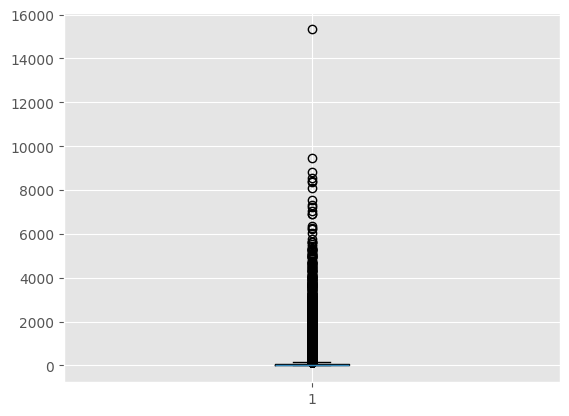

In [12]:
plt.boxplot(df['publico'])
plt.show()

Através do describe e do boxplot é possível identificar um valor discrepante muito longe dos demais, vamos tentar entende-lo um pouco melhor

In [13]:
# Verificando as informações do valor discrepante
df.loc[df['publico'] > 10000]

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
4077070,2022-06-15,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Sala Da Cinema Restinga,15322,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks


In [14]:
# Verificando mais informações sobre a sala específica
df.loc[df['nome_sala'] == 'Sala Da Cinema Restinga'] 

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
4077070,2022-06-15,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Sala Da Cinema Restinga,15322,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks


In [15]:
df.loc[df['nome_sala'] == 'Sala De Cinema Restinga'] 

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
4029367,2022-06-04,Quatro Ases O Monumental Super Herói De Alvorada,Quatro Ases O Monumental Super Herói De Alvorada,Brasil,NaN,Sala De Cinema Restinga,2500,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
4131750,2022-06-27,Monumental Super Kids,Monumental Super Kids,Brasil,NaN,Sala De Cinema Restinga,4703,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks


In [16]:
#verificando informações sobre o filme específico
super_tinga_df = df.loc[df['titulo_original'] == 'Super Tinga Herói De Dois Continentes']
super_tinga_df.sort_values(by= 'publico', ascending=False).head(15)

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
4077070,2022-06-15,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Sala Da Cinema Restinga,15322,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
4140562,2022-06-29,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Sala De Cinema Lomba Do Pinheiro,7034,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
912786,2019-08-30,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,5001099.00,Sala Noberto Lubisco,5632,NaN,2864.00,6750.00,Porto Alegre,Rs,Luciano Da Luz Moucks
290846,2019-04-28,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,5001099.00,Sala Noberto Lubisco,2500,NaN,2864.00,6750.00,Porto Alegre,Rs,Luciano Da Luz Moucks
6371474,2023-09-06,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,920,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
6652971,2023-10-26,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,808,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
6377049,2023-09-07,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,802,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
6873106,2023-12-08,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,800,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
6812748,2023-11-26,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,800,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks
6807133,2023-11-25,Super Tinga Herói De Dois Continentes,Super Tinga Herói De Dois Continentes,Brasil,NaN,Luciano Da Luz Moucks,800,NaN,NaN,NaN,Porto Alegre,Rs,Luciano Da Luz Moucks


Como a sala com o valor máximo possui um erro ortográfico no nome, e para além disso, possui um valor muito acima dos demais desta sala com o nome correto e dos demais filmes do dataset, irei dropar essa linha específica. 

Além da linha que possuía o nome da sala errado e o valor máximo, é possível observar que este filme em si possui alguns valores muito acima da média, e alguns valores padrões, que não parecem condizer com a realidade. Realizando uma breve pesquisa, não é possível afirmar que as salas de cinemas registradas para este filme suportam ou não números tão altos de publico como os registrados acima. Nesse caso, será dropado do dataset o filme em si.

In [17]:
df.drop(4077067, inplace=True)
df = df[df['titulo_original'] != 'Super Tinga Herói De Dois Continentes']


In [18]:
df['publico'].describe()

count   7495275.00
mean         64.54
std         105.19
min           1.00
25%          10.00
50%          28.00
75%          74.00
max        9445.00
Name: publico, dtype: float64

Criando uma tabela SQL com o DuckDB a partir do dataframe

In [19]:
#transformando o dataframe em um banco de dados duckdb
duckdb.sql('CREATE TABLE bilheteria AS SELECT * FROM df')

In [20]:
# Utilizando SQL para identificar as salas que não possuem as demais informações do complexo
duckdb.sql('''
SELECT DISTINCT (nome_sala), COUNT(*) AS contagem
FROM bilheteria
WHERE uf_sala_complexo IS NULL
GROUP BY nome_sala, uf_sala_complexo
''').show()

┌─────────────────────────────────┬──────────┐
│            nome_sala            │ contagem │
│             varchar             │  int64   │
├─────────────────────────────────┼──────────┤
│ Cinesystem Morumbi Town Sala 10 │        7 │
│ Cine + Arte Criciuma (Sala 01)  │        8 │
│ NULL                            │        2 │
│ Centerplex Lapa 1               │        4 │
│ Ims Paulista                    │       35 │
│ Cine Alto                       │        2 │
│ Cine + Arte Criciúma 2          │       16 │
└─────────────────────────────────┴──────────┘



In [21]:
duckdb.sql(''' 
SELECT data_exibicao, titulo_original, nome_sala, nome_distribuidora, municipio_sala_complexo, uf_sala_complexo 
FROM bilheteria
WHERE nome_sala = 'Cine Alto' OR nome_sala IS NULL
''').show() 

┌─────────────────────┬──────────────────────┬───────────┬───┬──────────────────────┬──────────────────┐
│    data_exibicao    │   titulo_original    │ nome_sala │ … │ municipio_sala_com…  │ uf_sala_complexo │
│    timestamp_ns     │       varchar        │  varchar  │   │       varchar        │     varchar      │
├─────────────────────┼──────────────────────┼───────────┼───┼──────────────────────┼──────────────────┤
│ 2020-08-21 00:00:00 │ Volume Morto         │ Cine Alto │ … │ NULL                 │ NULL             │
│ 2020-08-23 00:00:00 │ Volume Morto         │ Cine Alto │ … │ NULL                 │ NULL             │
│ 2021-08-27 00:00:00 │ Encarcerados         │ NULL      │ … │ NULL                 │ NULL             │
│ 2023-11-18 00:00:00 │ Incompatível Com A…  │ NULL      │ … │ NULL                 │ NULL             │
├─────────────────────┴──────────────────────┴───────────┴───┴──────────────────────┴──────────────────┤
│ 4 rows                                               

Tendo em vista que as únicas salas que não são possíveis identificar as informações do complexo são as salas 'NULL' e 'CINE ALTO', e considerando que possuem apenas 4 registros de exibição, irei excluir os registros dessas salas do dataset

In [22]:
# Excluindo registros da tabela que não possuem informações do complexo

duckdb.sql("""DELETE FROM bilheteria
           WHERE nome_sala = 'Cine Alto' OR NOME_SALA IS NULL""")

duckdb.sql("""SELECT DISTINCT (nome_sala), COUNT(*)
           FROM bilheteria
           WHERE uf_sala_complexo IS NULL
           GROUP BY nome_sala, uf_sala_complexo
           """).show()

┌─────────────────────────────────┬──────────────┐
│            nome_sala            │ count_star() │
│             varchar             │    int64     │
├─────────────────────────────────┼──────────────┤
│ Ims Paulista                    │           35 │
│ Centerplex Lapa 1               │            4 │
│ Cinesystem Morumbi Town Sala 10 │            7 │
│ Cine + Arte Criciuma (Sala 01)  │            8 │
│ Cine + Arte Criciúma 2          │           16 │
└─────────────────────────────────┴──────────────┘



Ajustando demais informações para que possam ser utilizadas na análise as salas que não possuem informações do complexo


In [23]:
duckdb.sql(''' 
SELECT DISTINCT (nome_sala), registro_grupo_exibidor, registro_exibidor, registro_complexo, municipio_sala_complexo
FROM bilheteria
WHERE nome_sala LIKE '%Cine + Arte%'
''').show()


┌──────────────────────────┬─────────────────────────┬───────────────────┬───────────────────┬─────────────────────────┐
│        nome_sala         │ registro_grupo_exibidor │ registro_exibidor │ registro_complexo │ municipio_sala_complexo │
│         varchar          │         double          │      double       │      double       │         varchar         │
├──────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼─────────────────────────┤
│ Cine + Arte Xangri-Lá …  │               6000103.0 │           32155.0 │           45890.0 │ Xangri-Lá               │
│ Cine + Arte Capão Da C…  │               6000103.0 │           32155.0 │           36025.0 │ Capão Da Canoa          │
│ Cine + Arte Criciúma 2   │                    NULL │              NULL │              NULL │ Criciúma                │
│ Cine + Arte Criciuma     │                    NULL │           44714.0 │           52187.0 │ Criciúma                │
│ Cine + Arte Capão Da C…  │    

In [24]:
# Identificado que já existe um registro de uma sala "Cine + Arte Criciúma". Nesse caso, será usado o mesmo REGISTRO_EXIBIDOR e REGISTRO_COMPLEXO para as salas que não possuem essas informações

duckdb.sql("""UPDATE bilheteria
           SET registro_exibidor = 44714.0, registro_complexo = 52187.0, municipio_sala_complexo  = 'Criciúma', uf_sala_complexo = 'Sc'
           WHERE nome_sala = 'Cine + Arte Criciuma (Sala 01)'""")

duckdb.sql("""UPDATE bilheteria
           SET nome_sala = 'Cine + Arte Criciúma (Sala 2)', registro_exibidor = 44714.0, registro_complexo = 52187.0, municipio_sala_complexo  = 'Criciúma', uf_sala_complexo = 'Sc'
           WHERE nome_sala = 'Cine + Arte Criciúma 2'""")

duckdb.sql("""SELECT DISTINCT (nome_sala), COUNT(*)
           FROM bilheteria
           WHERE uf_sala_complexo IS NULL
           GROUP BY nome_sala, uf_sala_complexo
           """).show()


┌─────────────────────────────────┬──────────────┐
│            nome_sala            │ count_star() │
│             varchar             │    int64     │
├─────────────────────────────────┼──────────────┤
│ Centerplex Lapa 1               │            4 │
│ Cinesystem Morumbi Town Sala 10 │            7 │
│ Ims Paulista                    │           35 │
└─────────────────────────────────┴──────────────┘



In [25]:
duckdb.sql(''' 
SELECT DISTINCT (nome_sala), registro_grupo_exibidor, registro_exibidor, registro_complexo, municipio_sala_complexo
FROM bilheteria
WHERE nome_sala LIKE '%Ims%'
''').show()



┌───────────────┬─────────────────────────┬───────────────────┬───────────────────┬─────────────────────────┐
│   nome_sala   │ registro_grupo_exibidor │ registro_exibidor │ registro_complexo │ municipio_sala_complexo │
│    varchar    │         double          │      double       │      double       │         varchar         │
├───────────────┼─────────────────────────┼───────────────────┼───────────────────┼─────────────────────────┤
│ Ims Paulista  │                    NULL │              NULL │              NULL │ São Paulo               │
│ Cinema Ims-Rj │                    NULL │             860.0 │            5411.0 │ Rio De Janeiro          │
│ Ims Poços     │                    NULL │             860.0 │           57167.0 │ Poços De Caldas         │
│ Ims Paulista  │                    NULL │              NULL │              NULL │ NULL                    │
└───────────────┴─────────────────────────┴───────────────────┴───────────────────┴─────────────────────────┘



In [26]:
# Como não foi identificado nenhuma outra sala com nome parecido com IMS Paulista em São Paulo, e verificando que o REGISTRO_EXIBIDOR das salas IMS em outras cidades são iguais, será utilizado o mesmo REGISTRO_EXIBIDOR existente, e será criado um novo REGISTRO_COMPLEXO para a sala IMS Paulista

duckdb.sql("""UPDATE bilheteria
           SET registro_exibidor = 860.0, registro_complexo = 400.0, municipio_sala_complexo  = 'São Paulo', uf_sala_complexo = 'Sp'
           WHERE nome_sala = 'Ims Paulista'""")

duckdb.sql("""SELECT DISTINCT (nome_sala), COUNT(*)
           FROM bilheteria
           WHERE uf_sala_complexo IS NULL
           GROUP BY nome_sala, uf_sala_complexo
           """).show()

┌─────────────────────────────────┬──────────────┐
│            nome_sala            │ count_star() │
│             varchar             │    int64     │
├─────────────────────────────────┼──────────────┤
│ Centerplex Lapa 1               │            4 │
│ Cinesystem Morumbi Town Sala 10 │            7 │
└─────────────────────────────────┴──────────────┘



In [27]:
duckdb.sql(''' 
SELECT DISTINCT (nome_sala), registro_grupo_exibidor, registro_exibidor, registro_complexo, municipio_sala_complexo
FROM bilheteria
WHERE nome_sala LIKE '%Centerplex Lapa%'
''').show()

┌──────────────────────────┬─────────────────────────┬───────────────────┬───────────────────┬─────────────────────────┐
│        nome_sala         │ registro_grupo_exibidor │ registro_exibidor │ registro_complexo │ municipio_sala_complexo │
│         varchar          │         double          │      double       │      double       │         varchar         │
├──────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼─────────────────────────┤
│ Centerplex Lapa Drive-…  │               6000006.0 │            2836.0 │            2842.0 │ São Paulo               │
│ Centerplex Lapa 3        │               6000006.0 │            2836.0 │            2842.0 │ São Paulo               │
│ Centerplex Lapa 1        │                    NULL │              NULL │              NULL │ NULL                    │
│ Centerplex Lapa 2        │               6000006.0 │            2836.0 │            2842.0 │ São Paulo               │
│ Centerplex Lapa 2        │    

In [28]:
duckdb.sql("""UPDATE bilheteria
           SET registro_exibidor = 2836.0, registro_complexo = 2842.0, municipio_sala_complexo  = 'São Paulo', uf_sala_complexo = 'Sp', registro_grupo_exibidor = 6000006.0 
           WHERE nome_sala IN ('Centerplex Lapa 1', 'Centerplex Lapa 2') AND registro_grupo_exibidor IS NULL""")

duckdb.sql("""SELECT DISTINCT (nome_sala), COUNT(*)
           FROM bilheteria
           WHERE uf_sala_complexo IS NULL
           GROUP BY nome_sala, uf_sala_complexo
           """).show()

┌─────────────────────────────────┬──────────────┐
│            nome_sala            │ count_star() │
│             varchar             │    int64     │
├─────────────────────────────────┼──────────────┤
│ Cinesystem Morumbi Town Sala 10 │            7 │
└─────────────────────────────────┴──────────────┘



In [29]:
duckdb.sql('''
SELECT DISTINCT (nome_sala), registro_grupo_exibidor, registro_exibidor, registro_complexo, municipio_sala_complexo
FROM bilheteria
WHERE nome_sala LIKE '%Cinesystem Morumbi Town%'
''').show()

┌──────────────────────────┬─────────────────────────┬───────────────────┬───────────────────┬─────────────────────────┐
│        nome_sala         │ registro_grupo_exibidor │ registro_exibidor │ registro_complexo │ municipio_sala_complexo │
│         varchar          │         double          │      double       │      double       │         varchar         │
├──────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼─────────────────────────┤
│ Cinesystem Morumbi Tow…  │               6000027.0 │           22546.0 │           34941.0 │ São Paulo               │
│ Cinesystem Morumbi Tow…  │                    NULL │              NULL │              NULL │ NULL                    │
│ Cinesystem Morumbi Tow…  │               6000027.0 │           22546.0 │           34941.0 │ São Paulo               │
│ Cinesystem Morumbi Tow…  │               6000027.0 │           22546.0 │           34941.0 │ São Paulo               │
│ Cinesystem Morumbi Tow…  │    

In [30]:
duckdb.sql("""UPDATE bilheteria
           SET registro_exibidor = 22546.0, registro_complexo = 34941.0, municipio_sala_complexo  = 'São Paulo', uf_sala_complexo = 'Sp', registro_grupo_exibidor = 6000027.0 
           WHERE nome_sala = 'Cinesystem Morumbi Town Sala 10'""")

duckdb.sql("""SELECT DISTINCT (nome_sala), COUNT(*)
           FROM bilheteria
           WHERE uf_sala_complexo IS NULL
           GROUP BY nome_sala, uf_sala_complexo
           """).show()

┌───────────┬──────────────┐
│ nome_sala │ count_star() │
│  varchar  │    int64     │
├──────────────────────────┤
│          0 rows          │
└──────────────────────────┘



In [31]:
df = duckdb.sql("SELECT * FROM bilheteria").to_df()
df

,data_exibicao,titulo_original,titulo_brasil,pais_obra,registro_sala,nome_sala,publico,registro_grupo_exibidor,registro_exibidor,registro_complexo,municipio_sala_complexo,uf_sala_complexo,nome_distribuidora
0,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005371.00,2118 Cinemark Center Shopping Jacarepaguá Sala 04,15,6000018.00,1843.00,31558.00,Rio De Janeiro,Rj,Columbia Tristar Filmes Do Brasil Ltda
1,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5005376.00,2120 Cinemark Mogi Das Cruzes Sala 05,80,6000018.00,1843.00,31561.00,Mogi Das Cruzes,Sp,Columbia Tristar Filmes Do Brasil Ltda
2,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000678.00,Abc Plaza 10,41,6000018.00,1843.00,896.00,Santo André,Sp,Columbia Tristar Filmes Do Brasil Ltda
3,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5002062.00,Agua Verde 1,17,6000023.00,12893.00,12894.00,Curitiba,Pr,Columbia Tristar Filmes Do Brasil Ltda
4,2019-03-01,A Dog´S Way Home,A Caminho De Casa,Estados Unidos,5000799.00,Anália Franco - Sala 08,160,6000058.00,749.00,2622.00,São Paulo,Sp,Columbia Tristar Filmes Do Brasil Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495266,2024-03-31,The Zone Of Interest,Zona De Interesse,Estados Unidos,5001792.00,Saladearte Cinemam,27,6000052.00,5722.00,5694.00,Salvador,Ba,Diamond Films Do Brasil Produção E Distribuiçã...
7495267,2024-03-31,Utopia Tropical,Utopia Tropical,Brasil,5003418.00,Espaço Itaú De Cinema Brasilia 8,4,6000029.00,1944.00,20590.00,Brasília,Df,O2 Produções Artísticas E Cinematográficas Ltda.
7495268,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5000849.00,Cine Estação Net Botafogo Sala 2,10,6000030.00,2685.00,6713.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda
7495269,2024-03-31,Youssef Salem A Du Succès,O Livro Da Discórdia,França,5002218.00,Estação Net Gávea 3,4,6000030.00,592.00,13608.00,Rio De Janeiro,Rj,Bonfilm Produção E Distribuição Audiovisual Ltda


In [32]:
df.isnull().sum()

data_exibicao                   0
titulo_original                 0
titulo_brasil                   0
pais_obra                       0
registro_sala               24012
nome_sala                       0
publico                         0
registro_grupo_exibidor    667010
registro_exibidor           23189
registro_complexo           23189
municipio_sala_complexo         0
uf_sala_complexo                0
nome_distribuidora              0
dtype: int64

In [33]:
# Total de salas de cinema existentes na base
duckdb.sql(''' SELECT COUNT(DISTINCT nome_sala) AS total_salas FROM bilheteria''')


┌─────────────┐
│ total_salas │
│    int64    │
├─────────────┤
│        4694 │
└─────────────┘

## **5. Analisando os dados**

### **5.1. Quais os filmes com maior público durante o período registrado na base?**

In [34]:
# 10 filmes com maior publico
mais_assistidos = duckdb.sql('''
SELECT 
   titulo_original, 
   titulo_brasil,                           
   nome_distribuidora,                        
   SUM(publico) AS publico_total
FROM bilheteria
GROUP BY all
ORDER BY SUM(publico) DESC
LIMIT 10           
''').to_df()
mais_assistidos

,titulo_original,titulo_brasil,nome_distribuidora,publico_total
0,Avengers: Endgame,Vingadores: Ultimato,The Walt Disney Company (Brasil) Ltda.,19656475.00
1,Spider-Man: No Way Home,Homem-Aranha: Sem Volta Para Casa,Columbia Tristar Filmes Do Brasil Ltda,17382043.00
2,The Lion King,O Rei Leão,The Walt Disney Company (Brasil) Ltda.,16249412.00
3,Avatar: The Way Of Water,Avatar: O Caminho Da Água,The Walt Disney Company (Brasil) Ltda.,11708274.00
4,Minha Mãe É Uma Peça 3,Minha Mãe É Uma Peça 3,Freespirit Distribuidora De Filmes Ltda.,10936882.00
5,Barbie,Barbie,Warner Bros. (South) Inc.,10930429.00
6,Joker,Coringa,Warner Bros. (South) Inc.,9761831.00
7,Captain Marvel,Capitã Marvel,The Walt Disney Company (Brasil) Ltda.,8993542.00
8,Doctor Strange In The Multiverse Of Madness,Doutor Estranho No Multiverso Da Loucura,The Walt Disney Company (Brasil) Ltda.,8489568.00
9,Toy Story 4,Toy Story 4,The Walt Disney Company (Brasil) Ltda.,7955946.00


<function matplotlib.pyplot.show(close=None, block=None)>

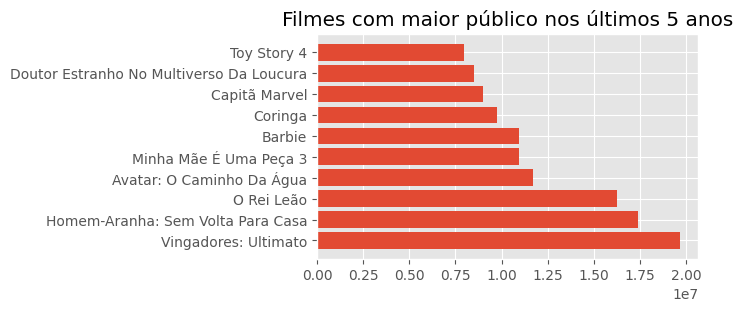

In [35]:
filmes = mais_assistidos['titulo_brasil']
valores = mais_assistidos['publico_total']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3), constrained_layout=True)
bars = ax.barh(filmes, valores)

ax.set_title('Filmes com maior público nos últimos 5 anos')


plt.show


### **5.2. Quais os filmes brasileiros com maior público durante o período registrado na base?**

In [36]:
mais_assistidos_br = duckdb.sql('''
SELECT 
   titulo_original, 
   titulo_brasil,                           
   nome_distribuidora,                        
   SUM(publico) AS publico_total
FROM bilheteria
GROUP BY all
HAVING pais_obra = 'Brasil'
ORDER BY SUM(publico) DESC
LIMIT 10           
''').to_df()
mais_assistidos_br

,titulo_original,titulo_brasil,nome_distribuidora,publico_total
0,Minha Mãe É Uma Peça 3,Minha Mãe É Uma Peça 3,Freespirit Distribuidora De Filmes Ltda.,10936882.00
1,Nada A Perder 2,Nada A Perder 2,Sm Distribuidora De Filmes Ltda,6189465.00
2,Minha Irmã E Eu,Minha Irmã E Eu,Sm Distribuidora De Filmes Ltda,2299370.00
3,Turma Da Mônica - Laços,Turma Da Mônica - Laços,Sm Distribuidora De Filmes Ltda,2129138.00
4,De Pernas Pro Ar 3,De Pernas Pro Ar 3,Sm Distribuidora De Filmes Ltda,1838586.00
5,De Pernas Pro Ar 3,De Pernas Pro Ar 3,Freespirit Distribuidora De Filmes Ltda.,1749328.00
6,Nosso Lar 2 - Os Mensageiros,Nosso Lar 2 - Os Mensageiros,The Walt Disney Company (Brasil) Ltda.,1649370.00
7,Os Farofeiros 2,Os Farofeiros 2,Freespirit Distribuidora De Filmes Ltda.,1548398.00
8,Os Parças 2,Os Parças 2,Sm Distribuidora De Filmes Ltda,1312134.00
9,Mamonas Assassinas O Filme,Mamonas Assassinas O Filme,Wmix Distribuidora Ltda.,877853.00


<function matplotlib.pyplot.show(close=None, block=None)>

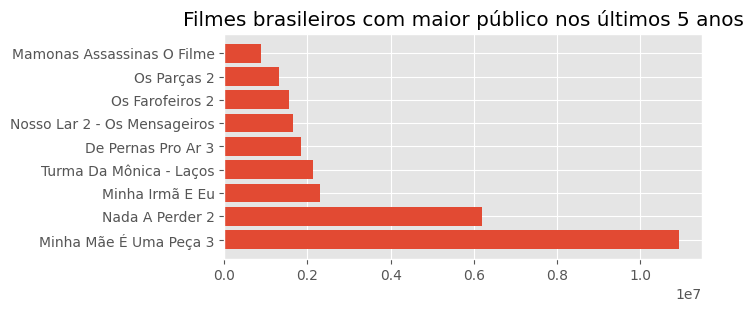

In [37]:
filmes = mais_assistidos_br['titulo_brasil']
valores = mais_assistidos_br['publico_total']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 3), constrained_layout=True)
bars = ax.barh(filmes, valores)

ax.set_title('Filmes brasileiros com maior público nos últimos 5 anos')


plt.show

### **5.3. Quantos filmes nacionais e internacionais foram exibidos?**

In [38]:
duckdb.sql('''
SELECT
    CASE 
        WHEN pais_obra = 'Brasil' THEN 'Nacionais'
        ELSE 'Internacionais'
    END AS tipo_filme,
    COUNT(DISTINCT titulo_brasil) AS total_filmes
FROM bilheteria
GROUP BY tipo_filme
''').show()

┌────────────────┬──────────────┐
│   tipo_filme   │ total_filmes │
│    varchar     │    int64     │
├────────────────┼──────────────┤
│ Nacionais      │          770 │
│ Internacionais │         1453 │
└────────────────┴──────────────┘



In [39]:
# Verificando quais países possuem filmes além do Brasil
duckdb.sql('''
SELECT 
    DISTINCT(pais_obra) AS país, 
    COUNT(DISTINCT titulo_brasil) AS total_filmes
FROM bilheteria
GROUP BY país
HAVING país <> 'Brasil'
ORDER BY total_filmes DESC
''').show()

┌───────────────────────┬──────────────┐
│         país          │ total_filmes │
│        varchar        │    int64     │
├───────────────────────┼──────────────┤
│ Estados Unidos        │          686 │
│ França                │          172 │
│ Alemanha              │           96 │
│ Bélgica               │           59 │
│ Argentina             │           46 │
│ Canadá                │           42 │
│ Reino Unido           │           32 │
│ Japão                 │           32 │
│ Itália                │           28 │
│ Portugal              │           28 │
│    ·                  │            · │
│    ·                  │            · │
│    ·                  │            · │
│ Belarus (Bielorussia) │            1 │
│ Tunísia               │            1 │
│ Suíça                 │            1 │
│ Índia                 │            1 │
│ Peru                  │            1 │
│ Congo                 │            1 │
│ Noruega               │            1 │
│ Costa Rica    

In [40]:
# Verificando total de filmes do Brasil e Estados Unidos juntos para comparar com os demais
duckdb.sql('''
SELECT
    CASE 
        WHEN pais_obra = 'Estados Unidos' THEN 'Brasil/Eua'
        WHEN pais_obra = 'Brasil' THEN 'Brasil/Eua'
        ELSE 'Outros'
    END AS tipo_filme,
    COUNT(DISTINCT titulo_brasil) AS total_filmes
FROM bilheteria
GROUP BY tipo_filme
ORDER BY total_filmes DESC
''').show()

┌────────────┬──────────────┐
│ tipo_filme │ total_filmes │
│  varchar   │    int64     │
├────────────┼──────────────┤
│ Brasil/Eua │         1453 │
│ Outros     │          768 │
└────────────┴──────────────┘



Existem filmes de 63 outros países além do Brasil. 
Dessa forma, é possível observar que o Brasil é o país com maior número de filmes exibidos, seguido dos Estados Unidos. Após Brasil e Estados Unidos, os demais filmes possuem pouquíssimas obras exibidas comparadas aos dois primeiros.

Brasil e Estados Unidos juntos possuem quase o dobro de obras que os outros 62 países juntos. 

### **5.4. Existe uma diferença significativa de publico entre filmes nacionais e internacionais?**


Na questão anterior vimos o número de filmes nacionais e internacionais exibidos, agora, queremos ver o total de exibições de filmes nacionais e internacionais


In [41]:

duckdb.sql('''
SELECT
    CASE 
        WHEN pais_obra = 'Brasil' THEN 'Nacionais'
        ELSE 'Internacionais'
    END AS tipo_filme,
    COUNT (*) AS total_exibicoes
FROM bilheteria
GROUP BY tipo_filme
''').show()

┌────────────────┬─────────────────┐
│   tipo_filme   │ total_exibicoes │
│    varchar     │      int64      │
├────────────────┼─────────────────┤
│ Internacionais │         6720000 │
│ Nacionais      │          775271 │
└────────────────┴─────────────────┘



Como há uma diferença muito grande entre exibições de filmes nacionais e internacionais (justamente por haver mais filmes internacionais exibidos), certamente o publico total em filmes internacionais será muito maior. Nesse caso, irei analisar algumas estatísticas descritivas para tentar entender se há uma diferença significativa de público entre os dois

In [42]:
nacionalidade = duckdb.sql('''
SELECT
    titulo_brasil,
    pais_obra,
    publico,
    CASE 
        WHEN pais_obra = 'Brasil' THEN 'Nacional'
        ELSE 'Internacional'
    END AS tipo_filme 
FROM bilheteria
''').to_df()

nacionalidade

,titulo_brasil,pais_obra,publico,tipo_filme
0,A Caminho De Casa,Estados Unidos,15,Internacional
1,A Caminho De Casa,Estados Unidos,80,Internacional
2,A Caminho De Casa,Estados Unidos,41,Internacional
3,A Caminho De Casa,Estados Unidos,17,Internacional
4,A Caminho De Casa,Estados Unidos,160,Internacional
...,...,...,...,...
7495266,Zona De Interesse,Estados Unidos,27,Internacional
7495267,Utopia Tropical,Brasil,4,Nacional
7495268,O Livro Da Discórdia,França,10,Internacional
7495269,O Livro Da Discórdia,França,4,Internacional


In [43]:
nacionalidade.groupby('tipo_filme')['publico'].sum()

tipo_filme
Internacional    440155136
Nacional          43554219
Name: publico, dtype: int64

In [44]:
nacionalidade.groupby('tipo_filme')['publico'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo_filme,,,,,,,,
Internacional,6720000.00,65.50,105.08,1.00,11.00,29.00,76.00,9445.00
Nacional,775271.00,56.18,105.76,1.00,7.00,19.00,56.00,4703.00


Analisando somente algumas estatísticas descritivas é possível notar que não há uma diferença muito grande. A média nos traz uma diferença de aproximadamente 9 pessoas a mais para filmes internacionais. Embora a média não seja uma medida muito ideal nesse caso, tendo em vista que há uma variação muito grande nos números, a mediana (valor central) nos traz um valor parecido com o da média, mostrando uma diferença de 10 pessoas a mais para filmes internacionais.

Em ambos podemos observar um desvio padrão bem alto e muito parecido para os dois casos



Porém, como o número total de exibições ainda é muito diferente (Mais de 6 milhões de exibições para filmes internacionais e nem 1 milhão de exibições para filmes nacionais), vamos tentar 'igualar' esse número para ter uma análise mais justa. Para isso, irei:

1. Criar uma nova coluna chamada "Quantil Publico" e dividir o conjunto de dados em 3 categorias (Baixo, médio e alto) com base no número do público. 

2. Separar uma amostra de registros para filmes nacionais e internacionais considerando somente o "Quantil publico" "Médio" (pois como o valor máximo de publico para filmes internacionais é muito maior que o valor máximo de publico para filmes nacionais, o quantil "Alto" poderia ser influenciado) e rodar novamente as medidas descritivas

In [45]:
nacionalidade['Quantil publico'] = pd.qcut(nacionalidade['publico'], q=3, labels=['Baixo', 'Médio', 'Alto'])

pub_medio_br = nacionalidade.loc[((nacionalidade['tipo_filme'] == 'Nacional') & (nacionalidade['Quantil publico'] == 'Médio'))]
pub_medio_in = nacionalidade.loc[((nacionalidade['tipo_filme'] == 'Internacional') & (nacionalidade['Quantil publico'] == 'Médio'))]

In [46]:
pub_medio_br['publico'].describe()

count   220849.00
mean        29.57
std         10.34
min         16.00
25%         21.00
50%         27.00
75%         37.00
max         52.00
Name: publico, dtype: float64

In [47]:
pub_medio_in['publico'].describe()

count   2209611.00
mean         30.48
std          10.46
min          16.00
25%          21.00
50%          29.00
75%          39.00
max          52.00
Name: publico, dtype: float64

Dessa forma vemos que existem quase 221 mil filmes nacionais, e mais de 2 milhões de filmes internacionais com publico 'Médio'

Com isso, vamos criar uma amostra de 200 mil registros para filmes nacionais e internacionais

In [48]:
amostra_br = pub_medio_br.sample(200000)
amostra_in = pub_medio_in.sample(200000)

In [49]:
amostra_br['publico'].describe()

count   200000.00
mean        29.56
std         10.35
min         16.00
25%         21.00
50%         27.00
75%         37.00
max         52.00
Name: publico, dtype: float64

In [50]:
amostra_in['publico'].describe()

count   200000.00
mean        30.49
std         10.46
min         16.00
25%         21.00
50%         29.00
75%         39.00
max         52.00
Name: publico, dtype: float64

Nos 3 casos acima (com a amostra ou sem a amostra) notamos uma diferença mínima. A diferença mínima pode ter sido causada devido a quantitade de publico ser limitada (entre 16 e 52 pessoas), mas ainda assim, é uma diferença pequena.

De todo modo, considerando que anteriormente, na primeira questão, vimos que dos 10 filmes com maior bilheteria geral apenas um deles é nacional, e agora vendo uma diferença na média e mediana do público, com um numero maior para filmes internacionais, podemos afirmar que filmes internacionais possuem um publico maior que filmes nacionais, porém, não podemos considerar uma diferença muito significativa entre eles

### **5.5. Qual é a média de público por estado?**


In [51]:
media_estados = duckdb.sql('''
SELECT
    uf_sala_complexo AS estados,
    AVG(publico) AS media_publico
FROM bilheteria
GROUP BY estados
ORDER BY media_publico DESC
''').to_df()

media_estados

,estados,media_publico
0,Ac,92.26
1,Am,75.64
2,Rj,74.38
3,Df,73.71
4,Rn,71.82
5,Pe,70.69
6,Ms,70.16
7,Rr,69.07
8,Al,67.92
9,Pi,67.54


Nesse caso, o cálculo da média é apenas para termos um indicativo da média de publico por estado, porém, ela não serve como comparação para afirmarmos que em um estado as pessoas vão mais ao cinema do que em outro, tendo em vista que há muita diferença no número de exibições de filme, como podemos ver abaixo

In [52]:
# Verificando o total de exibições por estado

total_exibicoes_por_estado = df['uf_sala_complexo'].value_counts().reset_index()
total_exibicoes_por_estado.columns = ['estado', 'total_exibicoes']

total_exibicoes_por_estado

,estado,total_exibicoes
0,Sp,2382968
1,Rj,873937
2,Mg,567756
3,Pr,446940
4,Rs,395178
5,Sc,333469
6,Ba,286015
7,Pe,253030
8,Go,232866
9,Ce,227873


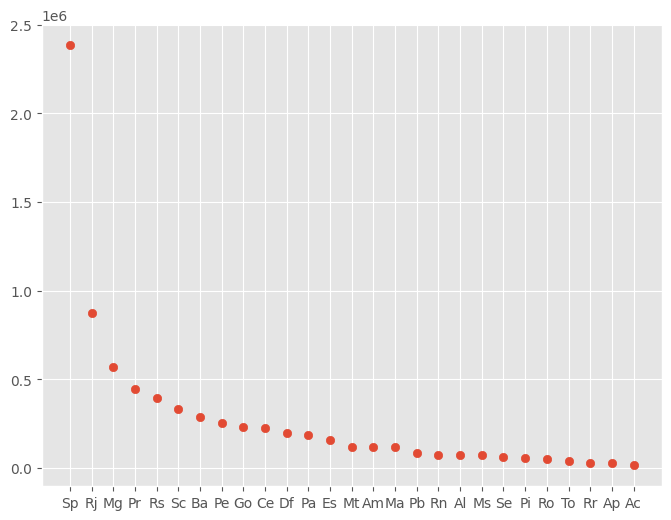

In [53]:
estados = total_exibicoes_por_estado['estado']
valores = total_exibicoes_por_estado['total_exibicoes']

plt.figure(figsize=(8, 6))
plt.scatter(estados, valores)

Enquanto o ACRE (Estado com a maior média) possui 15.854 exibições registradas na base, São Paulo possui quase 24 milhões de exibições. Visto isso, não faz sentido afirmarmos que no Acre as pessoas vão mais ao cinema do que em São Paulo, por exemplo

### **5.6. Quantos filmes diferentes foram exibidos em cada estado?**


In [54]:
total_filmes_por_estado = duckdb.sql('''
SELECT
    uf_sala_complexo AS estado,
    COUNT(DISTINCT titulo_brasil) AS total_filmes
FROM bilheteria
GROUP BY estado
ORDER BY total_filmes DESC
''').to_df()

total_filmes_por_estado

,estado,total_filmes
0,Sp,1947
1,Rj,1761
2,Rs,1560
3,Df,1538
4,Mg,1383
5,Ba,1363
6,Pr,1358
7,Pe,1277
8,Sc,1157
9,Ce,1126


Como um complemento para a questão anterior, aqui também podemos ver que - além de possuir o maior número de exibições registradas na base - o estado de São Paulo possui também o maior número de filmes diferentes exibidos. 

Ou seja, enquanto em São Paulo foram exibidos 1947 filmes diferentes, em 12 estados não foram exibidos nem 1000 filmes diferentes. O estado do Acre é o que menos possui títulos exibidos, com 487 filmes diferentes



In [55]:
filmes_sp = duckdb.sql('''
SELECT COUNT(DISTINCT titulo_brasil) AS total_filmes, COUNT(DISTINCT nome_distribuidora) AS total_distribuidoras
FROM bilheteria
WHERE uf_sala_complexo = 'Sp'
AND titulo_brasil NOT IN (SELECT titulo_brasil FROM bilheteria WHERE uf_sala_complexo = 'Ac')
''').to_df()

filmes_sp

,total_filmes,total_distribuidoras
0,1461,123


Mais uma vez comparando São Paulo e Acre, podemos identificar que existem 1461 filmes de 123 distribuidoras diferentes, que foram exibidos em São Paulo mas não foram exibidos no Acre.

### **5.7. Do período registrado na base, qual ano teve maior público?**

In [56]:
publico_ano = duckdb.sql('''
SELECT 
    EXTRACT (YEAR FROM data_exibicao) AS ano,
    SUM(publico) AS publico_total
FROM bilheteria
GROUP BY ano
ORDER BY ano
''').to_df()


publico_ano


,ano,publico_total
0,2019,151711890.00
1,2020,39350692.00
2,2021,53024143.00
3,2022,97419454.00
4,2023,116814884.00
5,2024,25388292.00


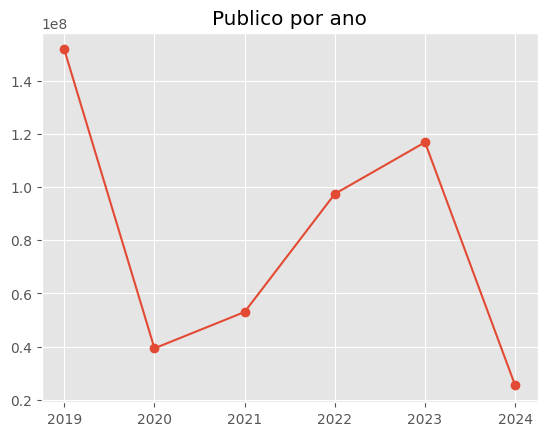

In [57]:
plt.plot(publico_ano['ano'], publico_ano['publico_total'],  marker='o')
plt.title('Publico por ano')
plt.show()

O ano com maior publico registrado na base foi o ano de 2019, mesmo com os registros começando em março e não tendo registrado os meses de janeiro e fevereiro

Em 2020 é possível identificar uma queda muito brusca nos números, muito provavelmente em decorrência da pandemia da covid, e um aumento gradativo nos anos de 2021, 2022 e 2023.

Em 2024 o número é baixo pois está registrado somente até o mês de março.

### **5.7. Existem meses específicos com maior público?**

In [58]:
meses = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
GROUP BY mes, mes_nome
ORDER BY mes   
''').to_df()

meses

,mes,mes_nome,publico_total
0,1,January,51329684.00
1,2,February,33657629.00
2,3,March,38136684.00
3,4,April,36970220.00
4,5,May,43769065.00
5,6,June,39133658.00
6,7,July,66224556.00
7,8,August,31188396.00
8,9,September,28579638.00
9,10,October,39189838.00


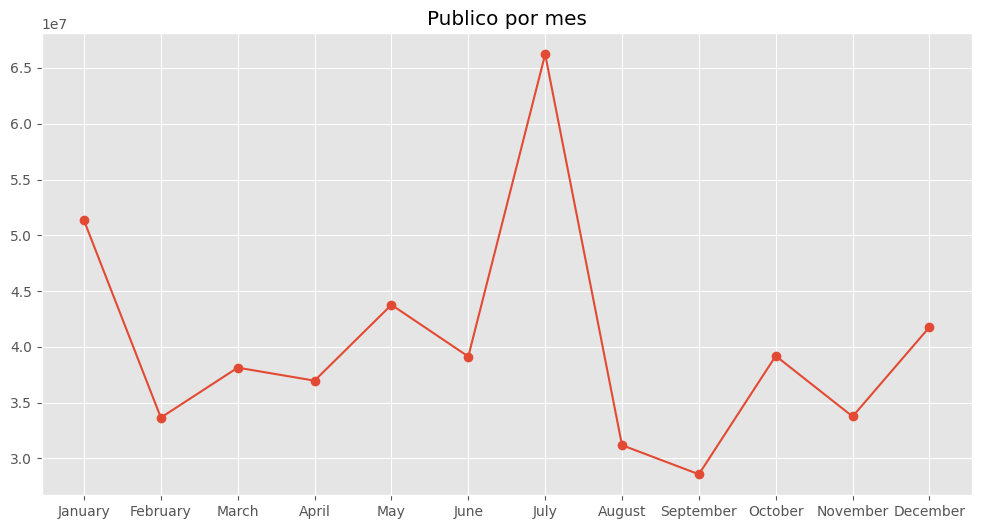

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(meses['mes_nome'], meses['publico_total'],  marker='o')
plt.title('Publico por mes')
plt.show()

Olhando de forma bruta apenas para os números e meses registrados na base, vemos que no mês de Julho há um aumento considerável, porém, ainda não sabemos se isso ocorre em todos os anos, ou foi influenciado por algum ano específico.

In [60]:
# Criando um dataframe para cada ano

# 2019
meses_19 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2019-01-01 00:00:00' AND '2019-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()

# 2020
meses_20 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2020-01-01 00:00:00' AND '2020-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()

# 2021
meses_21 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2021-01-01 00:00:00' AND '2021-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()

# 2022
meses_22 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2022-01-01 00:00:00' AND '2022-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()

# 2023
meses_23 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2023-01-01 00:00:00' AND '2023-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()

# 2024
meses_24 = duckdb.sql('''
SELECT 
    EXTRACT (MONTH FROM data_exibicao) AS mes,
    MONTHNAME (data_exibicao) AS mes_nome,
    SUM(publico) AS publico_total
FROM bilheteria
WHERE data_exibicao BETWEEN '2024-01-01 00:00:00' AND '2024-12-31 00:00:00'
GROUP BY mes, mes_nome
ORDER BY mes
''').to_df()




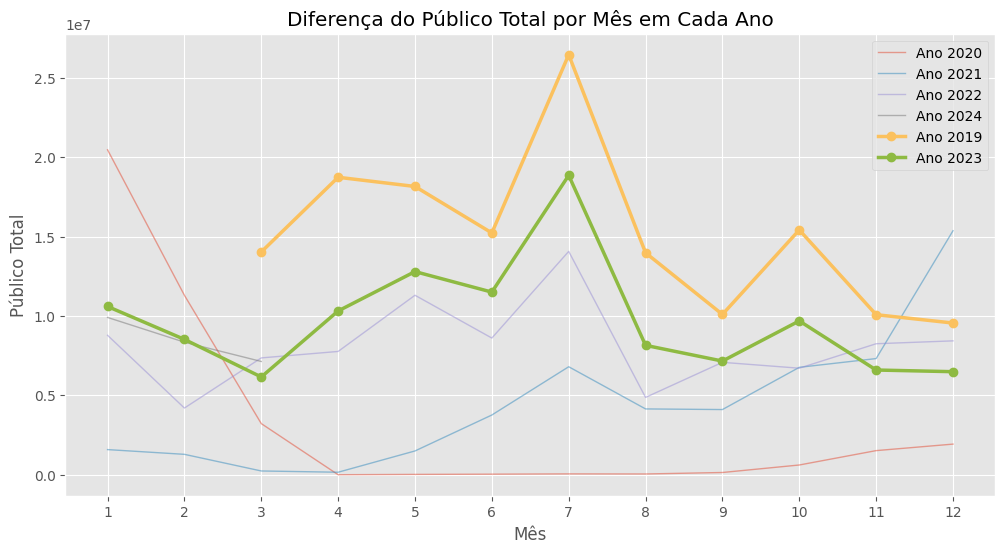

In [61]:
# Verificando os números de todos os anos, com destaque para o ano de 2019 (anterior a pandemia) e 2023 (3 anos após a pandemia)

dataframes = [meses_19, meses_20, meses_21, meses_22, meses_23, meses_24]
anos = [2019, 2020, 2021, 2022, 2023, 2024]
anos_destaque = [2019, 2023]

plt.figure(figsize=(12, 6))

for df, ano in zip(dataframes, anos):
    if ano not in anos_destaque:
        plt.plot(df['mes'], df['publico_total'], alpha=0.5, label=f'Ano {ano}', linewidth=1)

for df, ano in zip(dataframes, anos):
    if ano in anos_destaque:
        plt.plot(df['mes'], df['publico_total'], marker='o', label=f'Ano {ano}', linewidth=2.5)

plt.title('Diferença do Público Total por Mês em Cada Ano')
plt.xlabel('Mês')
plt.ylabel('Público Total')
plt.xticks(range(1, 13)) 
plt.legend()
plt.grid(True)
plt.show()

Através deste gráfico vemos que de fato, em todos os anos (com exceção de 2020) tende a ocorrer um aumento de publico no mês de Julho, que aparentemente é o mês com o maior número de público nos cinemas.

Para além disso, outras observações que conseguimos fazer com este gráfico, é que em 3 anos após a pandemia, os números do publico nos cinemas praticamente ainda não alcançaram os números anteriores à pandemia. Com exceção do mês de dezembro de 2021 (onde provavelmente os cinemas começaram a ser mais flexíveis e o público começou a retornar em maior escala, ou devido a exibição de um grande filme), no ano de 2022 os números ainda não chegaram próximo aos números de 2019.

De todo modo, fica evidente que - após 2020 - os números começaram a crescer a partir do mês 5 de 2021, e desde então, vem aumentando de forma gradativa a cada ano, conforme visto também na questão anterior. De modo geral, 2023 é o ano com os números mais próximos aos números de 2019 desde 2020

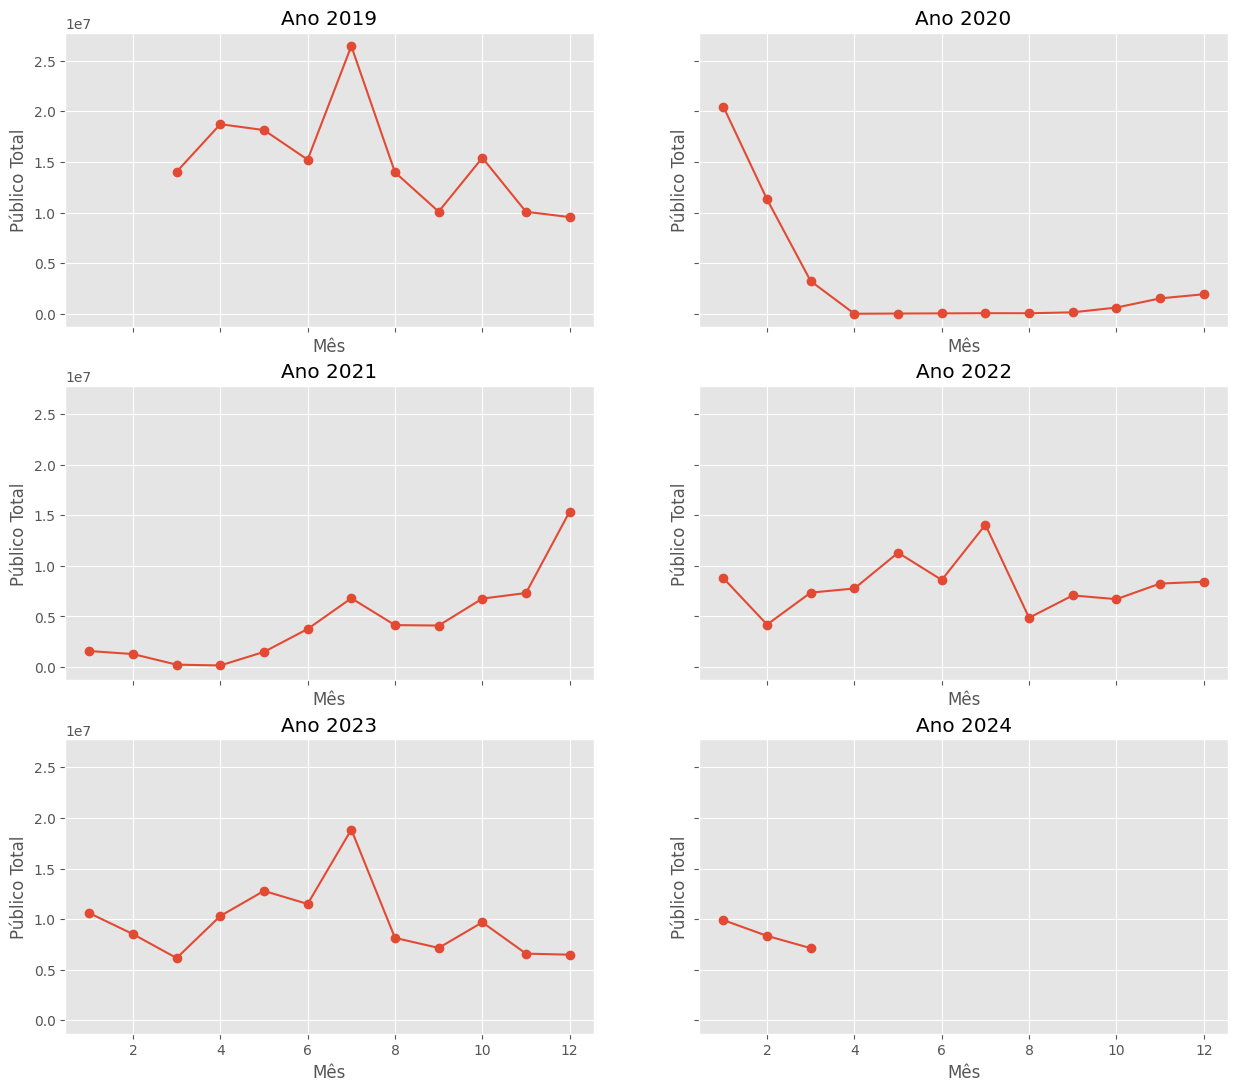

In [62]:
# Verificando os números por ano separadamente

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 13), sharex=True, sharey=True)
axes = axes.flatten() 

for ax, df, ano in zip(axes, dataframes, anos):
    ax.plot(df['mes'], df['publico_total'], marker='o', label=f'Ano {ano}')
    ax.set_title(f'Ano {ano}')
    ax.set_xlabel('Mês')
    ax.set_ylabel('Público Total')
    ax.grid(True)

Através desta visualização vemos de forma mais clara dois pontos:  
- Em todos os anos (com exceção de 2020) ocorre um aumento de público no mês de Julho;  
- Os números começaram a aumentar a partir de maio de 2021, e desde então, vem se aproximando cada vez mais dos números de 2019

## **Bonus**

##### 10 cidades com maior número de exibições de filmes durante o período registrado na base

In [63]:
duckdb.sql('''
SELECT 
    COUNT(titulo_brasil) AS total_filmes, 
    municipio_sala_complexo AS municipio, 
    uf_sala_complexo AS estado
FROM bilheteria
GROUP BY all
ORDER BY total_filmes DESC
LIMIT 10
''')

┌──────────────┬────────────────┬─────────┐
│ total_filmes │   municipio    │ estado  │
│    int64     │    varchar     │ varchar │
├──────────────┼────────────────┼─────────┤
│       769675 │ São Paulo      │ Sp      │
│       496929 │ Rio De Janeiro │ Rj      │
│       196649 │ Brasília       │ Df      │
│       173760 │ Curitiba       │ Pr      │
│       168857 │ Belo Horizonte │ Mg      │
│       144100 │ Salvador       │ Ba      │
│       137665 │ Porto Alegre   │ Rs      │
│       137579 │ Fortaleza      │ Ce      │
│       120994 │ Campinas       │ Sp      │
│       119944 │ Manaus         │ Am      │
├──────────────┴────────────────┴─────────┤
│ 10 rows                       3 columns │
└─────────────────────────────────────────┘

#### 10 cidades com maior público (As 10 cidades do Brasil em que as pessoas mais foram ao cinema)

In [64]:
duckdb.sql('''
SELECT 
    SUM(publico) AS publico_total, 
    municipio_sala_complexo AS municipio, 
    uf_sala_complexo AS estado
FROM bilheteria
GROUP BY all
ORDER BY publico_total DESC
LIMIT 10
''')

┌───────────────┬────────────────┬─────────┐
│ publico_total │   municipio    │ estado  │
│    int128     │    varchar     │ varchar │
├───────────────┼────────────────┼─────────┤
│      57664264 │ São Paulo      │ Sp      │
│      37460728 │ Rio De Janeiro │ Rj      │
│      14495142 │ Brasília       │ Df      │
│      13032233 │ Belo Horizonte │ Mg      │
│      12029602 │ Curitiba       │ Pr      │
│      11736300 │ Fortaleza      │ Ce      │
│      10632425 │ Salvador       │ Ba      │
│       9287895 │ Recife         │ Pe      │
│       9099085 │ Manaus         │ Am      │
│       8974770 │ Campinas       │ Sp      │
├───────────────┴────────────────┴─────────┤
│ 10 rows                        3 columns │
└──────────────────────────────────────────┘

#### Total de exibições por ano

In [71]:
# Desconsiderando 2024 deste cálculo e do próximo, tendo em vista que neste ano possui apenas 3 meses de exibição

exibicoes_por_ano = duckdb.sql('''
SELECT 
    EXTRACT (YEAR FROM data_exibicao) AS ano,
    COUNT(titulo_brasil) AS total_filmes, 
FROM bilheteria
WHERE ano != 2024
GROUP BY all
ORDER BY ano 
''').to_df()

exibicoes_por_ano

,ano,total_filmes
0,2019,1544794
1,2020,590499
2,2021,1176187
3,2022,1735668
4,2023,1933293


In [70]:
exibicoes_por_ano['total_filmes'].describe()

count         5.00
mean    1396088.20
std      529940.41
min      590499.00
25%     1176187.00
50%     1544794.00
75%     1735668.00
max     1933293.00
Name: total_filmes, dtype: float64

Em média, são relizadas 1.396.088 exibições por ano no Brasil

#### Total de filmes por ano

In [72]:
filmes_por_ano = duckdb.sql('''
SELECT 
    EXTRACT (YEAR FROM data_exibicao) AS ano,
    COUNT(DISTINCT titulo_brasil) AS total_filmes, 
FROM bilheteria
WHERE ano != 2024
GROUP BY all
ORDER BY ano 
''').to_df()

filmes_por_ano

,ano,total_filmes
0,2019,606
1,2020,543
2,2021,467
3,2022,564
4,2023,633


In [73]:
filmes_por_ano['total_filmes'].describe()

count     5.00
mean    562.60
std      63.96
min     467.00
25%     543.00
50%     564.00
75%     606.00
max     633.00
Name: total_filmes, dtype: float64

Em média, são exibidos 562 filmes diferentes por ano nos cinemas brasileiros